In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Initialise combined dataframe and get data source


In [2]:
combined_df = pd.DataFrame()
excel_file = 'data/EDM 2021 Storm Overflow Annual Return - all water and sewerage companies.xlsx'
excel_data = pd.ExcelFile(excel_file)

## Heading cleanup

Headings are inconsistant in spelling and formatting. To resolve this issue, I am using the first sheet of headings. Also skipping the first row as it contains a workbook heading.

In [3]:
first_sheet_name = excel_data.sheet_names[0]
first_sheet_df = pd.read_excel(excel_file, sheet_name=first_sheet_name, skiprows=1)
filters = first_sheet_df.columns.tolist()

Loops through each sheet in the excel_data

In [5]:
for sheet_name in excel_data.sheet_names:
    sheet_df = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)
    filtered_df = sheet_df[filters]
    combined_df = combined_df._append(filtered_df, ignore_index=True)

print(combined_df)

      Water Company Name  Site Name\n(EA Consents Database)  \
0          Anglian Water  ABTHORPE TERMINAL PUMPING STATION   
1          Anglian Water                SCHOOL LANE SPS ABY   
2          Anglian Water                 AKELEY (EX STW) PS   
3          Anglian Water  ALDBOROUGH WATER RECYCLING CENTRE   
4          Anglian Water                      ALDEBURGH STW   
...                  ...                                ...   
28939    Yorkshire Water                    ROYAL HOTEL CSO   
28940    Yorkshire Water  SCARBOROUGH WASTE WATER TREATMENT   
28941    Yorkshire Water                MILLHOUSES PARK CSO   
28942    Yorkshire Water                MILLHOUSES PARK CSO   
28943    Yorkshire Water            Chapel Land Kilham CSO*   

            Site Name\n(WaSC operational)\n[optional]  \
0                   ABTHORPE TERMINAL PUMPING STATION   
1                                   ABY-SCHOOL LA TPS   
2                                  AKELEY (EX STW) SP   
3              

Filter out uncessary columns

In [12]:
selected_columns = ['Water Company Name', 
                    #'Site Name(EA Consents Database)', 
                    'Counted spills using 12-24h count method']
selected_df = combined_df[selected_columns]

print(selected_df)

      Water Company Name Counted spills using 12-24h count method
0          Anglian Water                                      0.0
1          Anglian Water                                      NaN
2          Anglian Water                                     51.0
3          Anglian Water                                      2.0
4          Anglian Water                                      7.0
...                  ...                                      ...
28939    Yorkshire Water                                      0.0
28940    Yorkshire Water                                      NaN
28941    Yorkshire Water                                      NaN
28942    Yorkshire Water                                      NaN
28943    Yorkshire Water                                      NaN

[28944 rows x 2 columns]


Total Spill count by water company

/tmp/ipykernel_884369/1886644148.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Counted spills using 12-24h count method'].fillna(0, inplace=True)


      Water Company Name  Counted spills using 12-24h count method
0          Anglian Water                                       0.0
1          Anglian Water                                       0.0
2          Anglian Water                                      51.0
3          Anglian Water                                       2.0
4          Anglian Water                                       7.0
...                  ...                                       ...
28939    Yorkshire Water                                       0.0
28940    Yorkshire Water                                       0.0
28941    Yorkshire Water                                       0.0
28942    Yorkshire Water                                       0.0
28943    Yorkshire Water                                       0.0

[28944 rows x 2 columns]


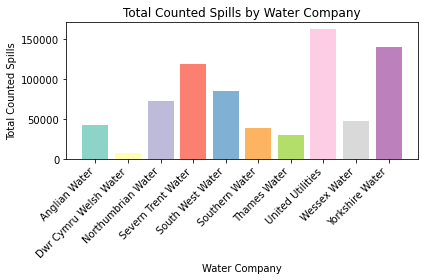

In [13]:
selected_df.loc[:, 'Counted spills using 12-24h count method'] = pd.to_numeric(selected_df['Counted spills using 12-24h count method'], errors='coerce')


selected_df['Counted spills using 12-24h count method'].fillna(0, inplace=True)

print(selected_df)
# Group the data by 'Water Company Name' and calculate the total spills
grouped_df = selected_df.groupby('Water Company Name')['Counted spills using 12-24h count method'].sum()

# Plot the bar chart
colours = plt.cm.Set3(np.arange(len(grouped_df)))
plt.bar(grouped_df.index, grouped_df.values, color=colours)
plt.xlabel('Water Company')
plt.ylabel('Total Counted Spills')
plt.title('Total Counted Spills by Water Company')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()